In [1]:
from bs4 import BeautifulSoup
import requests

keyword = '데이터 분석가'

URL = 'https://www.saramin.co.kr/zf_user/search/recruit?searchType=search&company_cd=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C9%2C10&keydownAccess=&searchword={}&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y&recruitPage=6&recruitSort=relation&recruitPageCount=40&inner_com_type=&show_applied=&quick_apply=&except_read=&ai_head_hunting=&mainSearch=n'.format(keyword) 
response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

200


In [2]:
# 태그 테스트
job_list = []

# 사람인 

div_tags = soup.select('#recruit_info .item_recruit')

for div_tag in div_tags:   
    
    job_info = {}   
    
    #print(div_tag.select('.job_condition > span')[0].text.strip())
    #print(div_tag.select('.job_condition > span')[1].text.strip())
    #print(div_tag.select('.job_condition > span')[2].text.strip())

    job_info['회사명'] = div_tag.select_one('.area_corp .track_event').text.strip()
    job_info['채용공고'] = div_tag.select_one('.area_job .job_tit').text.strip()
    job_info['경력'] = div_tag.select('.job_condition > span')[1].text.strip()
    job_info['지원자격'] = div_tag.select('.job_condition > span')[2].text.strip()
    #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
    job_info['지역'] = div_tag.select('.job_condition > span')[0].text.strip()
    job_info['플랫폼'] = '사람인'

    job_list.append(job_info)

job_list[0]

{'회사명': '십일번가(주)',
 '채용공고': '클라우드 엔지니어 모집',
 '경력': '경력3년↑',
 '지원자격': '학력무관',
 '지역': '서울 중구',
 '플랫폼': '사람인'}

In [3]:
# 페이징 처리
job_list = []

page = 1

while True:
    URL = 'https://www.saramin.co.kr/zf_user/search/recruit?searchType=search&company_cd=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C9%2C10&keydownAccess=&searchword={}&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y&recruitPage={}&recruitSort=relation&recruitPageCount=40&inner_com_type=&show_applied=&quick_apply=&except_read=&ai_head_hunting=&mainSearch=n'.format(keyword, page) 
    response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
    #response.status_code
  
    #print(URL)

    soup = BeautifulSoup(response.text, 'html.parser')

    no_result = soup.select('.info_no_result')

    print('현재 페이지' + str(page))

    if len(no_result) > 0:

        print('페이지 끝' + str(page))

        break

    else:
        div_tags = soup.select('#recruit_info .item_recruit')

        for div_tag in div_tags:   
            
            job_info = {}   
            
            # print(div_tag.select_one('.area_job .job_tit').text.strip())

            job_info['회사명'] = div_tag.select_one('.area_corp .track_event').text.strip()
            job_info['채용공고'] = div_tag.select_one('.area_job .job_tit').text.strip()
            job_info['경력'] = div_tag.select('.job_condition > span')[1].text.strip()
            job_info['지원자격'] = div_tag.select('.job_condition > span')[2].text.strip()
            #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
            job_info['지역'] = div_tag.select('.job_condition > span')[0].text.strip()
            job_info['플랫폼'] = '사람인'

            job_list.append(job_info)
    
    page += 1

job_list

현재 페이지1
현재 페이지2
현재 페이지3
현재 페이지4
현재 페이지5
현재 페이지6
현재 페이지7
현재 페이지8
현재 페이지9
현재 페이지10
현재 페이지11
현재 페이지12
현재 페이지13
현재 페이지14
현재 페이지15
현재 페이지16
현재 페이지17
현재 페이지18
현재 페이지19
현재 페이지20
현재 페이지21
현재 페이지22
현재 페이지23
현재 페이지24
현재 페이지25
현재 페이지26
현재 페이지27
현재 페이지28
현재 페이지29
현재 페이지30
현재 페이지31
현재 페이지32
페이지 끝32


[{'회사명': '(주)에이아이더뉴트리진',
  '채용공고': 'AI, 머신러닝 데이터분석가 등 신입 및 경력 채용',
  '경력': '신입·경력',
  '지원자격': '대졸↑',
  '지역': '서울 강남구',
  '플랫폼': '사람인'},
 {'회사명': '바탕에비뉴(주)',
  '채용공고': 'JAVA 개발자/빅데이터 분석가 채용',
  '경력': '경력',
  '지원자격': '대졸↑',
  '지역': '서울 금천구',
  '플랫폼': '사람인'},
 {'회사명': '(주)인터엑스',
  '채용공고': '데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)',
  '경력': '신입·경력',
  '지원자격': '학력무관',
  '지역': '서울전체',
  '플랫폼': '사람인'},
 {'회사명': '인텔렉추얼데이터(주)',
  '채용공고': 'eDiscovery Project Manager(데이터 분석가) 인턴 채용',
  '경력': '경력무관',
  '지원자격': '대졸↑',
  '지역': '서울 강남구',
  '플랫폼': '사람인'},
 {'회사명': '(주)와이리',
  '채용공고': "2030 여행 플랫폼 '와이리'에서 데이터분석가를 모집합니다 :)",
  '경력': '경력무관',
  '지원자격': '학력무관',
  '지역': '서울 중구',
  '플랫폼': '사람인'},
 {'회사명': '(주)패스트뷰',
  '채용공고': '[제품개발그룹] 데이터 분석가 (Data Analyst)',
  '경력': '경력 1~4년',
  '지원자격': '학력무관',
  '지역': '서울 강남구',
  '플랫폼': '사람인'},
 {'회사명': '콘센트릭스서비스코리아(유)',
  '채용공고': '데이터 분석가 채용',
  '경력': '경력 5~15년',
  '지원자격': '대졸↑',
  '지역': '서울 강남구',
  '플랫폼': '사람인'},
 {'회사명': '㈜네오플',
  '채용공고': '[네오플] 데이터분석팀 게임 운영/이상탐지 데이터 분석

In [4]:
# 잡코리아
URL = 'https://www.jobkorea.co.kr/Search/?stext={}&tabType=recruit&Page_No=1'.format(keyword) 
response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

200


In [5]:
div_tags = soup.select('.list-default .list-post')

for div_tag in div_tags:   
    
    job_info = {}   

    job_info['회사명'] = div_tag.select_one('.post-list-corp .name').text.strip() 
    job_info['채용공고'] = div_tag.select_one('.post-list-info .title').text.strip()
    job_info['경력'] = div_tag.select('.option > span')[0].text.strip()    
    job_info['지원자격'] = div_tag.select('.option > span')[1].text.strip()    
    #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
    job_info['지역'] = div_tag.select('.option > span')[4].text.strip()
    job_info['플랫폼'] = '잡코리아'

    print(job_info)

    job_list.append(job_info)

{'회사명': '(주)마이셀럽스', '채용공고': '[마이셀럽스] 데이터 분석가 정규직 채용', '경력': '경력2년↑', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜네오플', '채용공고': '[네오플] 게임 서비스 운영 데이터 분석가 모집', '경력': '경력무관', '지원자격': '학력무관', '지역': '제주 제주시', '플랫폼': '잡코리아'}
{'회사명': '펜타시스템테크놀러지㈜', '채용공고': 'Blue Analytics 데이터 분석가 채용 공고', '경력': '경력무관', '지원자격': '대졸↑', '지역': '서울 영등포구', '플랫폼': '잡코리아'}
{'회사명': 'Spoqa', '채용공고': '(주)스포카 데이터 분석가 채용 (팀장)', '경력': '경력7년↑', '지원자격': '학력무관', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜쿡앱스', '채용공고': '[쿡앱스] 게임 데이터 분석가 모집', '경력': '경력3년↑', '지원자격': '학력무관', '지역': '경기 성남시', '플랫폼': '잡코리아'}
{'회사명': '푸드노트서비스', '채용공고': '데이터 분석가 채용 (경력 2년 이상)', '경력': '경력2년↑', '지원자격': '학력무관', '지역': '서울 영등포구', '플랫폼': '잡코리아'}
{'회사명': '㈜엔데이터', '채용공고': '데이터분석가(컨설턴트) 신입/경력 모집', '경력': '신입·경력', '지원자격': '대졸↑', '지역': '서울 강남구 외', '플랫폼': '잡코리아'}
{'회사명': '㈜켄즈', '채용공고': '[신입/경력] (AI/ML활용) 데이터 분석가 모집', '경력': '신입·경력2년↑', '지원자격': '대졸↑', '지역': '경기 의왕시 외', '플랫폼': '잡코리아'}
{'회사명': '세일링스톤', '채용공고': '빠르게 성장 중인 세일링스톤에서 우리와 함께 성장 할 인재를 찾습니다. BI 전문가(데이

In [6]:
# 페이징 처리
page = 1

while True:
    URL = 'https://www.jobkorea.co.kr/Search/?stext={}&tabType=recruit&Page_No={}'.format(keyword, page) 
    response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
    #print(response.status_code)
  
    #print(URL)

    soup = BeautifulSoup(response.text, 'html.parser')

    no_result = soup.select('.list-default .list-post')

    print('현재 페이지' + str(page))

    if len(no_result) < 1:

        print('페이지 끝' + str(page))

        break

    else:
        div_tags = soup.select('.list-default .list-post')

        for div_tag in div_tags:   
            
            job_info = {}   

            job_info['회사명'] = div_tag.select_one('.post-list-corp .name').text.strip() 
            job_info['채용공고'] = div_tag.select_one('.post-list-info .title').text.strip()
            job_info['경력'] = div_tag.select('.option > span')[0].text.strip()    
            job_info['지원자격'] = div_tag.select('.option > span')[1].text.strip()    
            #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
            job_info['지역'] = div_tag.select_one('.option .long').text.strip()
            job_info['플랫폼'] = '잡코리아'

            print(job_info)

            job_list.append(job_info)
    
    page += 1

현재 페이지1
{'회사명': '(주)마이셀럽스', '채용공고': '[마이셀럽스] 데이터 분석가 정규직 채용', '경력': '경력2년↑', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜네오플', '채용공고': '[네오플] 게임 서비스 운영 데이터 분석가 모집', '경력': '경력무관', '지원자격': '학력무관', '지역': '제주 제주시', '플랫폼': '잡코리아'}
{'회사명': '펜타시스템테크놀러지㈜', '채용공고': 'Blue Analytics 데이터 분석가 채용 공고', '경력': '경력무관', '지원자격': '대졸↑', '지역': '서울 영등포구', '플랫폼': '잡코리아'}
{'회사명': 'Spoqa', '채용공고': '(주)스포카 데이터 분석가 채용 (팀장)', '경력': '경력7년↑', '지원자격': '학력무관', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜쿡앱스', '채용공고': '[쿡앱스] 게임 데이터 분석가 모집', '경력': '경력3년↑', '지원자격': '학력무관', '지역': '경기 성남시', '플랫폼': '잡코리아'}
{'회사명': '푸드노트서비스', '채용공고': '데이터 분석가 채용 (경력 2년 이상)', '경력': '경력2년↑', '지원자격': '학력무관', '지역': '서울 영등포구', '플랫폼': '잡코리아'}
{'회사명': '㈜엔데이터', '채용공고': '데이터분석가(컨설턴트) 신입/경력 모집', '경력': '신입·경력', '지원자격': '대졸↑', '지역': '서울 강남구 외', '플랫폼': '잡코리아'}
{'회사명': '㈜켄즈', '채용공고': '[신입/경력] (AI/ML활용) 데이터 분석가 모집', '경력': '신입·경력2년↑', '지원자격': '대졸↑', '지역': '경기 의왕시 외', '플랫폼': '잡코리아'}
{'회사명': '세일링스톤', '채용공고': '빠르게 성장 중인 세일링스톤에서 우리와 함께 성장 할 인재를 찾습니다. B

In [7]:
# 원티드
URL = 'https://www.wanted.co.kr/search?query={}'.format(keyword) 
response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

200


In [8]:

from selenium import webdriver
from bs4 import BeautifulSoup
import time

URL = 'https://www.wanted.co.kr/search?query={}'.format(keyword) 
# Chrome 브라우저를 자동으로 실행
driver = webdriver.Chrome("chromedriver.exe")

# 해당 URL에 접속
driver.get(URL)

# 브라우저에서 페이지가 로드되는 동안 대기
time.sleep(5)

SCROLL_PAUSE_SEC = 1

# 스크롤 높이 가져옴
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # 끝까지 스크롤 다운
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 1초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# BeautifulSoup을 사용하여 HTML 코드 파싱
soup = BeautifulSoup(driver.page_source, "html.parser")

# 채용 공고 정보 추출
div_tags = soup.select('.List_List_container__JnQMS .Card_className__u5rsb')

for div_tag in div_tags:  
    
    job_info['회사명'] = div_tag.select('.body > div')[1].text.strip()
    job_info['채용공고'] = div_tag.select('.body > div')[0].text.strip()
    job_info['경력'] = ""    
    job_info['지원자격'] = "" 
    #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
    job_info['지역'] = div_tag.select_one('.body .job-card-company-location').text.strip().split('.')[0]
    job_info['플랫폼'] = '원티드'

    print(job_info)

    job_list.append(job_info)

# 브라우저 종료
driver.quit()


{'회사명': '단색', '채용공고': '데이터 분석가(3년차)', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '아이네블루메(채티)', '채용공고': '데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '더블유클럽', '채용공고': '데이터 분석가 (Data Analyst) - 3년 이상', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '큐피스트(글램)', '채용공고': '데이터 분석가 (Data Analyst)', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '모요', '채용공고': 'Data Analyst / 데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '아우름플래닛(LINER)', '채용공고': '[100억↑투자] 프로덕트 데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '111퍼센트', '채용공고': '데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '뮤즈라이브(Muzlive)', '채용공고': '데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '게임듀오', '채용공고': '데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '카카오스타일(Kakao Style)', '채용공고': '지그재그 데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '에이블리코퍼레이션', '채용공고': '데이터 분석가 (Business D

In [9]:
len(job_list)

1362

In [10]:
job_list[1300]

{'회사명': '외국계 기업',
 '채용공고': '데이터 분석가(Online delivery System)(대리과장급)',
 '경력': '경력5년↑',
 '지원자격': '대졸↑',
 '지역': '서울 전지역',
 '플랫폼': '잡코리아'}

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline


In [12]:
# 리스트를 DataFrame으로 변환
df = pd.DataFrame(job_list, columns=['회사명', '채용공고','경력','지원자격','지역','플랫폼'])

print(df)

               회사명                                       채용공고     경력  지원자격  \
0     (주)에이아이더뉴트리진               AI, 머신러닝 데이터분석가 등 신입 및 경력 채용  신입·경력   대졸↑   
1         바탕에비뉴(주)                       JAVA 개발자/빅데이터 분석가 채용     경력   대졸↑   
2          (주)인터엑스    데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)  신입·경력  학력무관   
3      인텔렉추얼데이터(주)  eDiscovery Project Manager(데이터 분석가) 인턴 채용   경력무관   대졸↑   
4           (주)와이리       2030 여행 플랫폼 '와이리'에서 데이터분석가를 모집합니다 :)   경력무관  학력무관   
...            ...                                        ...    ...   ...   
1357                                                                         
1358                                                                         
1359                                                                         
1360                                                                         
1361                                                                         

          지역  플랫폼  
0     서울 강남구  사람인  
1     서울 금천구  사람인  
2  

In [13]:
print(df.info(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     1362 non-null   object
 1   채용공고    1362 non-null   object
 2   경력      1362 non-null   object
 3   지원자격    1362 non-null   object
 4   지역      1362 non-null   object
 5   플랫폼     1362 non-null   object
dtypes: object(6)
memory usage: 64.0+ KB
None 회사명     0
채용공고    0
경력      0
지원자격    0
지역      0
플랫폼     0
dtype: int64


<Axes: xlabel='플랫폼'>

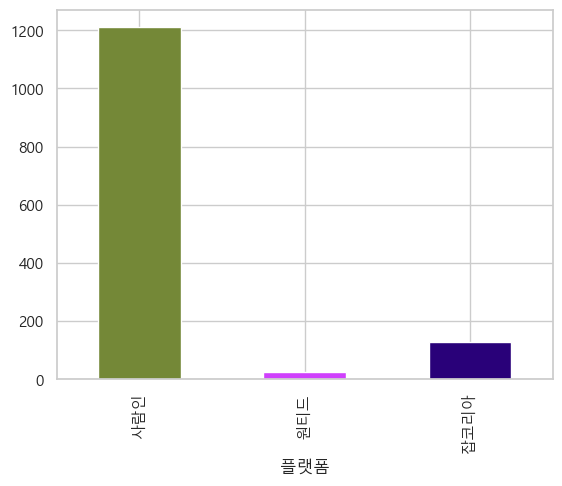

In [14]:
import numpy as np

col = np.random.rand(len(df.groupby('플랫폼')['채용공고']),3)  ## 색상 지정
 
df.groupby('플랫폼')['채용공고'].count().plot(kind='bar',color=col)


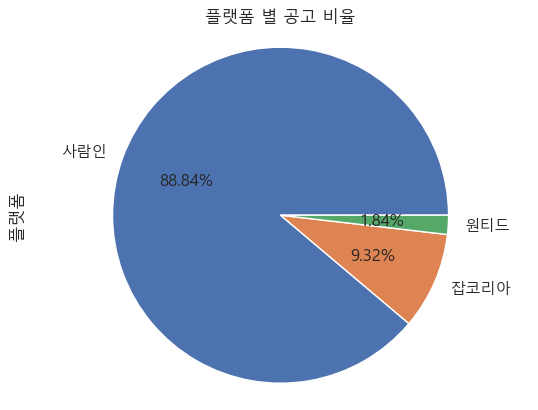

In [15]:
df3 = df.플랫폼.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("플랫폼 별 공고 비율")
plt.axis('equal')
plt.show()

In [16]:
df.groupby('지역').count()


,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
,25,25,25,25,25
강원 원주시,1,1,1,1,1
강원 춘천시,1,1,1,1,1
경기 고양시,2,2,2,2,2
경기 고양시 덕양구,3,3,3,3,3
...,...,...,...,...,...
충북 청주시 상당구,1,1,1,1,1
충북 청주시 서원구,2,2,2,2,2
충북 청주시 청원구,1,1,1,1,1


In [17]:
contains_seoul = df['지역'].str.contains('서울')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
subset_df = df[contains_seoul]

subset_df

,회사명,채용공고,경력,지원자격,지역,플랫폼
0,(주)에이아이더뉴트리진,"AI, 머신러닝 데이터분석가 등 신입 및 경력 채용",신입·경력,대졸↑,서울 강남구,사람인
1,바탕에비뉴(주),JAVA 개발자/빅데이터 분석가 채용,경력,대졸↑,서울 금천구,사람인
2,(주)인터엑스,"데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)",신입·경력,학력무관,서울전체,사람인
3,인텔렉추얼데이터(주),eDiscovery Project Manager(데이터 분석가) 인턴 채용,경력무관,대졸↑,서울 강남구,사람인
4,(주)와이리,2030 여행 플랫폼 '와이리'에서 데이터분석가를 모집합니다 :),경력무관,학력무관,서울 중구,사람인
...,...,...,...,...,...,...
1325,중소기업(300명이하),[올룰로/킥고잉]Product Owner(앱서비스),경력5년↑,대졸↑,서울 강남구,잡코리아
1326,대기업,데이터사이언스 팀장/(10-15년) - 식품 대기업(급),경력10년↑,대졸↑,서울 마포구 외,잡코리아
1327,대기업 계열사·자회사,[국내 대기업 그룹 제조 계열사] (데이터 분석 기반) 디지털혁신팀장 채용,경력13년↑,대졸↑,서울 종로구,잡코리아
1328,111퍼센트㈜,[111퍼센트]데이터 분석가 모집\r\n\t\t\t\t\t\t\t\t\t게임잡,경력5년↑,학력무관,서울 강남구,잡코리아


In [18]:
subset_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
서울 강남구,295,295,295,295,295
서울 강남구 외,6,6,6,6,6
서울 강서구,19,19,19,19,19
서울 관악구,2,2,2,2,2
서울 광진구,1,1,1,1,1
서울 구로구,13,13,13,13,13
서울 구로구 외,1,1,1,1,1
서울 금천구,34,34,34,34,34
서울 동대문구,4,4,4,4,4


In [19]:
contains_seoul = df['지역'].str.contains('강원')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
subset_df = df[contains_seoul]

subset_df

subset_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
강원 원주시,1,1,1,1,1
강원 춘천시,1,1,1,1,1


In [20]:
# 데이터 전처리 진행 전 dataframe 백업해놓고 진행
copy_df = df.copy()

In [21]:
type(copy_df['지역'])

pandas.core.series.Series

In [22]:
#df.loc[df['지역'].str.contains('서울'), '서울']

In [23]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '서울' if '서울' in x else x)

In [24]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '강원' if '강원' in x else x)

In [25]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '경기' if '경기' in x else x)

In [26]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '충북' if '충북' in x else x)

In [27]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '경남' if '경남' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '경북' if '경북' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '충남' if '충남' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '대구' if '대구' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '광주' if '광주' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '제주' if '제주' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '부산' if '부산' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '대전' if '대전' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '전남' if '전남' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '전북' if '전북' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '세종' if '세종' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '인천' if '인천' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '울산' if '울산' in x else x)

In [28]:
copy_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
,25,25,25,25,25
강원,2,2,2,2,2
경기,256,256,256,256,256
경남,9,9,9,9,9
경북,9,9,9,9,9
광주,4,4,4,4,4
대구,10,10,10,10,10
대전,49,49,49,49,49
부산,13,13,13,13,13


In [29]:
america = copy_df[copy_df['지역'].str.contains('미국')].index
japan = copy_df[copy_df['지역'].str.contains('일본')].index
asia = copy_df[copy_df['지역'].str.contains('아시아')].index
europe = copy_df[copy_df['지역'].str.contains('유럽')].index
mexico = copy_df[copy_df['지역'].str.contains('멕시코')].index
copy_df.drop(america, inplace=True)
copy_df.drop(japan, inplace=True)
copy_df.drop(asia, inplace=True)
copy_df.drop(europe, inplace=True)
copy_df.drop(mexico, inplace=True)

In [30]:
copy_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
,25,25,25,25,25
강원,2,2,2,2,2
경기,256,256,256,256,256
경남,9,9,9,9,9
경북,9,9,9,9,9
광주,4,4,4,4,4
대구,10,10,10,10,10
대전,49,49,49,49,49
부산,13,13,13,13,13


<Axes: ylabel='지역'>

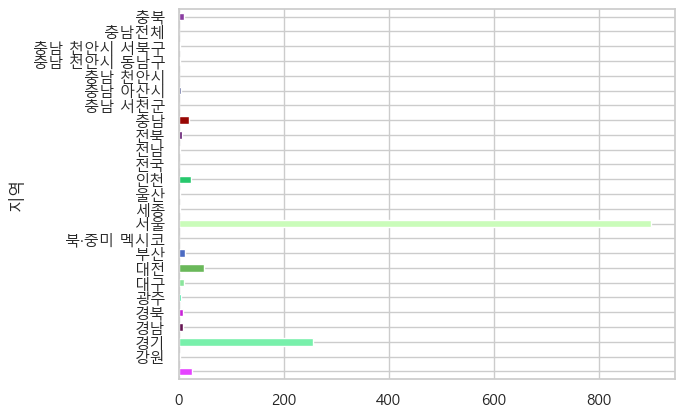

In [31]:
col = np.random.rand(len(copy_df.groupby('지역')['채용공고']),3)  ## 색상 지정


copy_df.groupby('지역')['채용공고'].count().plot(kind='barh',color=col)

In [32]:
len(copy_df.groupby('지역'))

25

In [33]:
copy_df.groupby('지역').groups.keys()

dict_keys(['', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '북·중미 멕시코', '서울', '세종', '울산', '인천', '전국', '전남', '전북', '충남', '충남 서천군', '충남 아산시', '충남 천안시', '충남 천안시 동남구', '충남 천안시 서북구', '충남전체', '충북'])

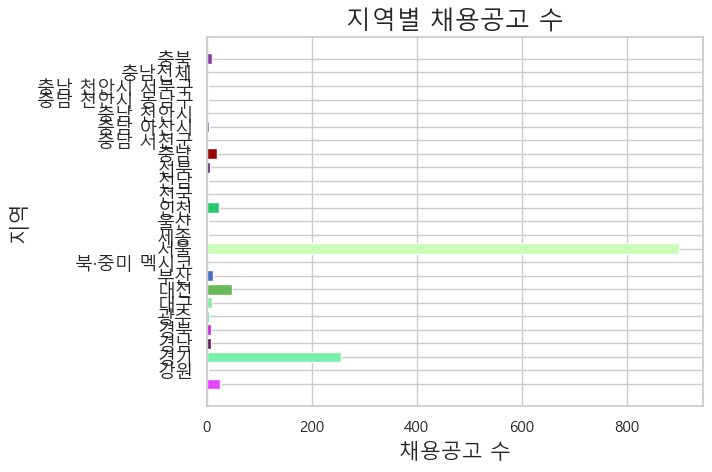

In [34]:
import numpy as np

y = np.arange(len(copy_df.groupby('지역')))
region = copy_df.groupby('지역').groups.keys()
values = copy_df.groupby('지역')['채용공고'].count()

plt.barh(y, values,color=col)

plt.title('지역별 채용공고 수', fontsize=18)

plt.ylabel('지역', fontsize=15)

plt.xlabel('채용공고 수', fontsize=15)

plt.yticks(y, region, fontsize=13, rotation=0)

plt.show()

In [35]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [36]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [37]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my_app')

main_location = geolocator.geocode('서울')
print(main_location.latitude, main_location.longitude)

37.5666791 126.9782914


In [38]:
contains_seoul = df['지역'].str.contains('서울')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
seoul_df = df[contains_seoul]

seoul_df = seoul_df.loc[:,['회사명','지역']]

seoul_df

,회사명,지역
0,(주)에이아이더뉴트리진,서울 강남구
1,바탕에비뉴(주),서울 금천구
2,(주)인터엑스,서울전체
3,인텔렉추얼데이터(주),서울 강남구
4,(주)와이리,서울 중구
...,...,...
1325,중소기업(300명이하),서울 강남구
1326,대기업,서울 마포구 외
1327,대기업 계열사·자회사,서울 종로구
1328,111퍼센트㈜,서울 강남구


In [39]:
seoul_df.groupby('지역').count()

,회사명
지역,
서울 강남구,295
서울 강남구 외,6
서울 강서구,19
서울 관악구,2
서울 광진구,1
서울 구로구,13
서울 구로구 외,1
서울 금천구,34
서울 동대문구,4


In [40]:
seoul_out = seoul_df[seoul_df['지역'].str.contains('외')].index
seoul_all = seoul_df[seoul_df['지역'].str.contains('전체')].index
seoul = seoul_df[seoul_df['지역'] == '서울'].index
seoul_all2 = seoul_df[seoul_df['지역'].str.contains('전지역')].index
seoul_df.drop(seoul_out, inplace=True)
seoul_df.drop(seoul_all, inplace=True)
seoul_df.drop(seoul_all2, inplace=True)
seoul_df.drop(seoul, inplace=True)

In [41]:
seoul_df.groupby('지역').count()

,회사명
지역,
서울 강남구,295
서울 강서구,19
서울 관악구,2
서울 광진구,1
서울 구로구,13
서울 금천구,34
서울 동대문구,4
서울 동작구,3
서울 마포구,38


In [42]:
# 중복제거
seoul_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [43]:
seoul_df.iloc[0]

회사명    (주)에이아이더뉴트리진
지역           서울 강남구
Name: 0, dtype: object

In [44]:
seoul_df['lat'] = ''
seoul_df['long'] = ''

In [45]:
seoul_df.head(5)

,회사명,지역,lat,long
0,(주)에이아이더뉴트리진,서울 강남구,,
1,바탕에비뉴(주),서울 금천구,,
3,인텔렉추얼데이터(주),서울 강남구,,
4,(주)와이리,서울 중구,,
5,(주)패스트뷰,서울 강남구,,


In [46]:
for idx, row in seoul_df.iterrows():
    print("행 인덱스: ", idx)    
    print("지역 ", seoul_df.loc[idx,'지역'])    
    location = geolocator.geocode(seoul_df.loc[idx,'지역'])
    seoul_df.loc[idx,'lat'] = location.latitude
    seoul_df.loc[idx,'long'] = location.longitude  

    #print(seoul_df.loc[idx,'지역'], seoul_df.loc[idx,'lat'], seoul_df.loc[idx,'long'])

    # if idx == 12:
    #     break


행 인덱스:  0
지역  서울 강남구
행 인덱스:  1
지역  서울 금천구
행 인덱스:  3
지역  서울 강남구
행 인덱스:  4
지역  서울 중구
행 인덱스:  5
지역  서울 강남구
행 인덱스:  6
지역  서울 강남구
행 인덱스:  9
지역  서울 강남구
행 인덱스:  12
지역  서울 성동구
행 인덱스:  15
지역  서울 강남구
행 인덱스:  16
지역  서울 강남구
행 인덱스:  18
지역  서울 서초구
행 인덱스:  19
지역  서울 강남구
행 인덱스:  20
지역  서울 강남구
행 인덱스:  24
지역  서울 강남구
행 인덱스:  26
지역  서울 영등포구
행 인덱스:  27
지역  서울 성동구
행 인덱스:  29
지역  서울 강남구
행 인덱스:  31
지역  서울 강남구
행 인덱스:  32
지역  서울 강남구
행 인덱스:  34
지역  서울 영등포구
행 인덱스:  35
지역  서울 강남구
행 인덱스:  36
지역  서울 강남구
행 인덱스:  37
지역  서울 종로구
행 인덱스:  38
지역  서울 송파구
행 인덱스:  40
지역  서울 강남구
행 인덱스:  42
지역  서울 서초구
행 인덱스:  43
지역  서울 중구
행 인덱스:  45
지역  서울 성동구
행 인덱스:  49
지역  서울 강남구
행 인덱스:  51
지역  서울 영등포구
행 인덱스:  54
지역  서울 강남구
행 인덱스:  56
지역  서울 강남구
행 인덱스:  57
지역  서울 영등포구
행 인덱스:  60
지역  서울 동대문구
행 인덱스:  65
지역  서울 마포구
행 인덱스:  66
지역  서울 강서구
행 인덱스:  70
지역  서울 강남구
행 인덱스:  71
지역  서울 강남구
행 인덱스:  72
지역  서울 종로구
행 인덱스:  73
지역  서울 영등포구
행 인덱스:  75
지역  서울 강서구
행 인덱스:  77
지역  서울 종로구
행 인덱스:  78
지역  서울 종로구
행 인덱스:  79
지역  서울 중구
행 인덱스:  81
지역  서울 송파구
행 인덱스:  83
지역 

In [47]:
seoul_df.head(5)

,회사명,지역,lat,long
0,(주)에이아이더뉴트리진,서울 강남구,37.5177,127.0473
1,바탕에비뉴(주),서울 금천구,37.4565,126.8954
3,인텔렉추얼데이터(주),서울 강남구,37.5177,127.0473
4,(주)와이리,서울 중구,37.556072,126.97236
5,(주)패스트뷰,서울 강남구,37.5177,127.0473


In [48]:
import folium

map = folium.Map(location=[main_location.latitude, main_location.longitude], zoom_start=12)

for idx, row in seoul_df.iterrows():    
    folium.Marker(location=[seoul_df.loc[idx,'lat'], seoul_df.loc[idx,'long']], popup=seoul_df.loc[idx,'회사명'],
                icon=folium.Icon(color='red')).add_to(map)
map

In [49]:
contains_gyeonggi = df['지역'].str.contains('경기')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
gyeonggi_df = df[contains_gyeonggi]

gyeonggi_df = gyeonggi_df.loc[:,['회사명','지역']]

gyeonggi_df

,회사명,지역
10,(주)카카오게임즈,경기 성남시 분당구
11,(주)인실리코젠,경기 용인시 기흥구
22,(주)브릭,경기 성남시 분당구
33,(주)쿡앱스,경기 성남시 분당구
41,(주)디구루,경기 성남시 분당구
...,...,...
1330,㈜쿡앱스(CookApps),경기 성남시
1331,넥슨,경기 성남시
1334,넥슨,경기 성남시
1335,넥슨,경기 성남시


In [50]:
gyeonggi_df.groupby('지역').count()

,회사명
지역,
경기 고양시,2
경기 고양시 덕양구,3
경기 고양시 일산동구,6
경기 고양시 일산서구,2
경기 과천시,2
경기 광명시,3
경기 광주시,2
경기 구리시,1
경기 군포시,1


In [51]:
gyeonggi_out = gyeonggi_df[gyeonggi_df['지역'].str.contains('외')].index
gyeonggi_all = gyeonggi_df[gyeonggi_df['지역'].str.contains('전체')].index
gyeonggi_df.drop(gyeonggi_out, inplace=True)
gyeonggi_df.drop(gyeonggi_all, inplace=True)

In [52]:
gyeonggi_df.groupby('지역').count()

,회사명
지역,
경기 고양시,2
경기 고양시 덕양구,3
경기 고양시 일산동구,6
경기 고양시 일산서구,2
경기 과천시,2
경기 광명시,3
경기 광주시,2
경기 구리시,1
경기 군포시,1


In [53]:
# 중복제거
gyeonggi_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

gyeonggi_df['lat'] = ''
gyeonggi_df['long'] = ''

for idx, row in gyeonggi_df.iterrows():
    print("행 인덱스: ", idx)    
    print("지역 ", gyeonggi_df.loc[idx,'지역'])    
    location = geolocator.geocode(gyeonggi_df.loc[idx,'지역'])
    gyeonggi_df.loc[idx,'lat'] = location.latitude
    gyeonggi_df.loc[idx,'long'] = location.longitude  

    #print(seoul_df.loc[idx,'지역'], seoul_df.loc[idx,'lat'], seoul_df.loc[idx,'long'])

    # if idx == 12:
    #     break


행 인덱스:  10
지역  경기 성남시 분당구
행 인덱스:  11
지역  경기 용인시 기흥구
행 인덱스:  22
지역  경기 성남시 분당구
행 인덱스:  33
지역  경기 성남시 분당구
행 인덱스:  41
지역  경기 성남시 분당구
행 인덱스:  46
지역  경기 성남시 수정구
행 인덱스:  52
지역  경기 의왕시
행 인덱스:  62
지역  경기 용인시
행 인덱스:  63
지역  경기 화성시
행 인덱스:  68
지역  경기 김포시
행 인덱스:  74
지역  경기 성남시 분당구
행 인덱스:  80
지역  경기 화성시
행 인덱스:  82
지역  경기 파주시
행 인덱스:  85
지역  경기 화성시
행 인덱스:  86
지역  경기 성남시 분당구
행 인덱스:  87
지역  경기 안양시 동안구
행 인덱스:  89
지역  경기 고양시
행 인덱스:  93
지역  경기 수원시
행 인덱스:  96
지역  경기 성남시 분당구
행 인덱스:  98
지역  경기 성남시 분당구
행 인덱스:  99
지역  경기 수원시 영통구
행 인덱스:  103
지역  경기 화성시
행 인덱스:  109
지역  경기 성남시 분당구
행 인덱스:  112
지역  경기 성남시 분당구
행 인덱스:  116
지역  경기 과천시
행 인덱스:  120
지역  경기 파주시
행 인덱스:  129
지역  경기 성남시 분당구
행 인덱스:  135
지역  경기 김포시
행 인덱스:  141
지역  경기 구리시
행 인덱스:  143
지역  경기 용인시
행 인덱스:  144
지역  경기 용인시
행 인덱스:  157
지역  경기 성남시
행 인덱스:  159
지역  경기 용인시 처인구
행 인덱스:  163
지역  경기 화성시
행 인덱스:  172
지역  경기 용인시 기흥구
행 인덱스:  190
지역  경기 시흥시
행 인덱스:  196
지역  경기 성남시 분당구
행 인덱스:  198
지역  경기 성남시 분당구
행 인덱스:  202
지역  경기 성남시 분당구
행 인덱스:  214
지역  경기 수원시 영통구
행 인덱스:  216
지역  경

In [54]:
main_location = geolocator.geocode('경기도')
print(main_location.latitude, main_location.longitude)

37.2752 127.0095


In [55]:

map = folium.Map(location=[main_location.latitude, main_location.longitude], zoom_start=10)

for idx, row in gyeonggi_df.iterrows():    
    folium.Marker(location=[gyeonggi_df.loc[idx,'lat'], gyeonggi_df.loc[idx,'long']], popup=gyeonggi_df.loc[idx,'회사명'],
                icon=folium.Icon(color='red')).add_to(map)
map

In [56]:
%pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [57]:
%pip install sshtunnel

In [58]:
df.head(5)

,회사명,채용공고,경력,지원자격,지역,플랫폼
0,(주)에이아이더뉴트리진,"AI, 머신러닝 데이터분석가 등 신입 및 경력 채용",신입·경력,대졸↑,서울 강남구,사람인
1,바탕에비뉴(주),JAVA 개발자/빅데이터 분석가 채용,경력,대졸↑,서울 금천구,사람인
2,(주)인터엑스,"데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)",신입·경력,학력무관,서울전체,사람인
3,인텔렉추얼데이터(주),eDiscovery Project Manager(데이터 분석가) 인턴 채용,경력무관,대졸↑,서울 강남구,사람인
4,(주)와이리,2030 여행 플랫폼 '와이리'에서 데이터분석가를 모집합니다 :),경력무관,학력무관,서울 중구,사람인


In [59]:
df.groupby('지원자격').count()

,회사명,채용공고,경력,지역,플랫폼
지원자격,,,,,
,25,25,25,25,25
고졸↑,52,52,52,52,52
대졸,4,4,4,4,4
대졸↑,534,534,534,534,534
박사,13,13,13,13,13
석사,1,1,1,1,1
석사↑,99,99,99,99,99
초대졸↑,174,174,174,174,174
학력무관,460,460,460,460,460


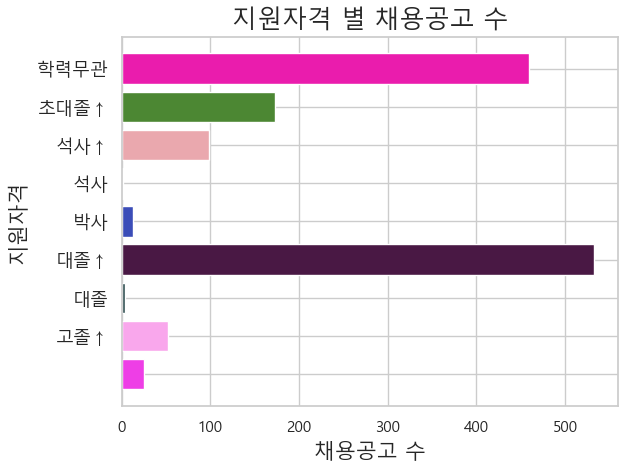

In [60]:
import numpy as np

y = np.arange(len(copy_df.groupby('지원자격')))
region = copy_df.groupby('지원자격').groups.keys()
values = copy_df.groupby('지원자격')['채용공고'].count()

col = np.random.rand(len(values),3)  ## 색상 지정

plt.barh(y, values,color=col)

plt.title('지원자격 별 채용공고 수', fontsize=18)

plt.ylabel('지원자격', fontsize=15)

plt.xlabel('채용공고 수', fontsize=15)

plt.yticks(y, region, fontsize=13, rotation=0)

plt.show()

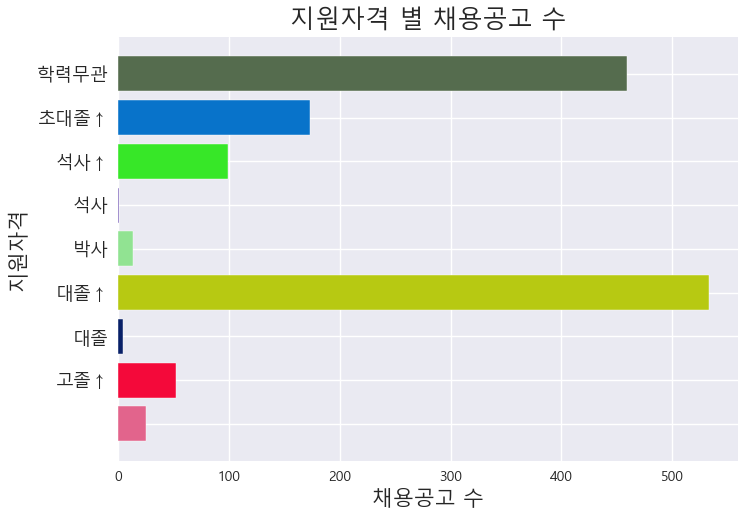

In [61]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'Malgun Gothic'

y = np.arange(len(copy_df.groupby('지원자격')))
region = copy_df.groupby('지원자격').groups.keys()
values = copy_df.groupby('지원자격')['채용공고'].count()

col = np.random.rand(len(values),3)  ## 색상 지정

plt.barh(y, values,color=col)

plt.title('지원자격 별 채용공고 수', fontsize=18)

plt.ylabel('지원자격', fontsize=15)

plt.xlabel('채용공고 수', fontsize=15)

plt.yticks(y, region, fontsize=13, rotation=0)

plt.show()